In [236]:
#import libraries
import pandas as pd
import numpy as np

#importing liabraries for graphical representation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.patches as mpatches
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

#Packages for feature engineering
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from statsmodels.tools.eval_measures import rmse
from scipy import stats
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
#import catboost as cb
import os
import random
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,\
                            recall_score, f1_score, roc_auc_score, classification_report,\
                            roc_curve, auc
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

## DATA LOADING

In [237]:
df = pd.read_csv('train.csv')
df.head(5)

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [238]:
df.shape

(19536, 12)

## BASIC DATA CHECK

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UserID                             19536 non-null  object 
 1   realtionship_status                19536 non-null  object 
 2   industry                           19536 non-null  object 
 3   genre                              19536 non-null  object 
 4   targeted_sex                       19536 non-null  object 
 5   average_runtime(minutes_per_week)  19536 non-null  int64  
 6   airtime                            19536 non-null  object 
 7   airlocation                        19536 non-null  object 
 8   ratings                            19536 non-null  float64
 9   expensive                          19536 non-null  object 
 10  money_back_guarantee               19536 non-null  object 
 11  netgain                            19536 non-null  int

In [240]:
df.netgain.value_counts()

0    14886
1     4650
Name: netgain, dtype: int64

In [241]:
# Check for unique Value in the DataFrame.
df.nunique()

UserID                               19536
realtionship_status                      7
industry                                 6
genre                                    5
targeted_sex                             2
average_runtime(minutes_per_week)       89
airtime                                  3
airlocation                             42
ratings                                120
expensive                                3
money_back_guarantee                     2
netgain                                  2
dtype: int64

In [242]:
# Check for the maximum and minimum values to see if there are any invalid.
df.describe()

,average_runtime(minutes_per_week),ratings,netgain
count,19536.000000,19536.000000,19536.000000
mean,40.375665,0.038826,0.238022
std,12.483166,0.075971,0.425884
min,1.000000,0.000000,0.000000
25%,40.000000,0.027465,0.000000
50%,40.000000,0.027465,0.000000
75%,45.000000,0.027465,0.000000
max,99.000000,1.000000,1.000000


In [243]:
df.isnull().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

**Outlier Detection**

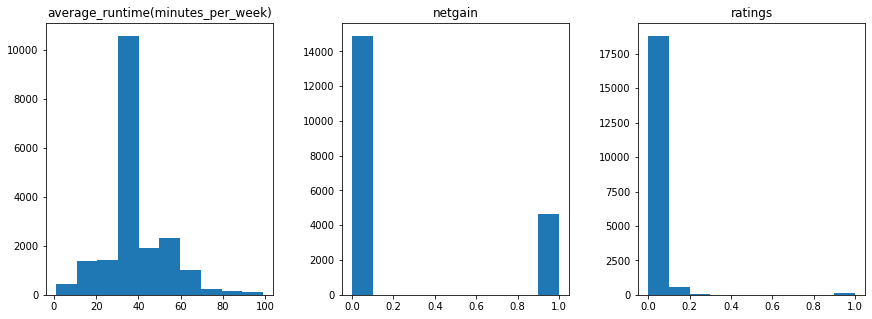

In [244]:
travel_plot = df.drop(['UserID'], axis = 1)
travel_plot.hist(grid=False,sharex=False,sharey=False,figsize=(20,5),layout=(1,4))
plt.show()

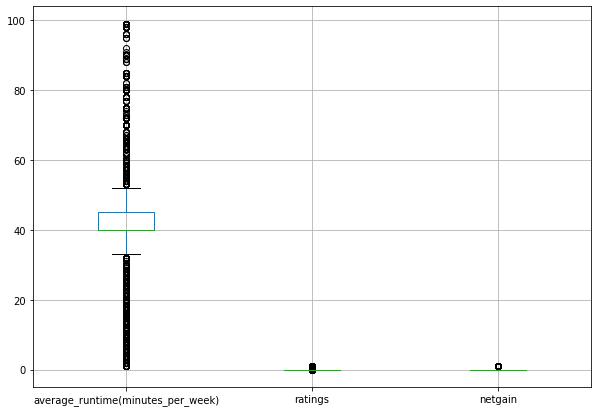

In [245]:
plt.figure(figsize=(10,7))
df.boxplot() 
plt.show()

## EDA

### Which industry made most gain

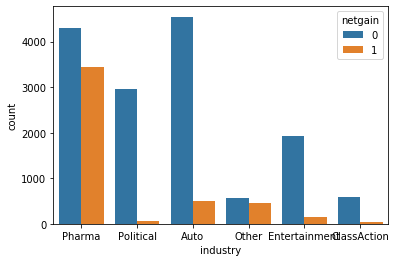

In [246]:
sns.countplot(x='industry', hue='netgain', data=df)

- Pharma industry have higher netgain
- ClassAction, Political, Entertainment low netgain

### Which genre increases netgain

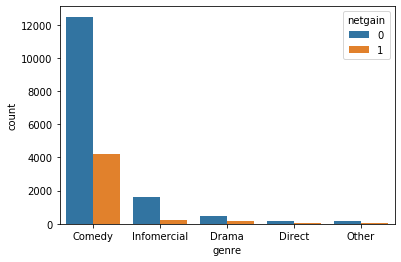

In [247]:
sns.countplot(x='genre', hue='netgain', data=df)

- Most of the ads have genre as Comedy, so its obvious that the netgain will be higher for this genre

## Does average_runtime increases the netgain?

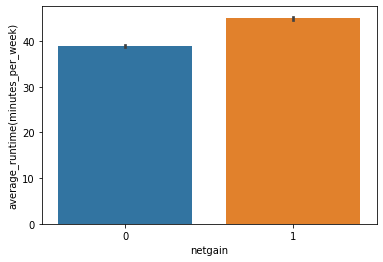

In [248]:
sns.barplot(x='netgain', y='average_runtime(minutes_per_week)', data=df)

- little more increase advertisement timing can netgain

### Does airtime affects netgain?

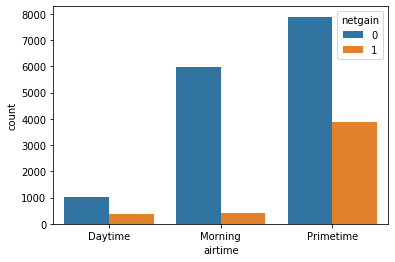

In [249]:
sns.countplot(x='airtime', hue='netgain', data=df)

- Ads which are shown on primtime have more netgain

### Distribution of netgain across airlocation

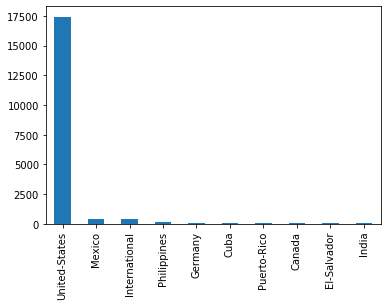

In [250]:
df['airlocation'].value_counts().nlargest(10).plot(kind='bar')

- United States have higher no. ads shown (90%)

In [251]:
df.airlocation.value_counts(normalize=True).mul(100)

United-States                 89.240377
Mexico                         2.016790
International                  1.817158
Philippines                    0.573301
Germany                        0.383907
Cuba                           0.348075
Puerto-Rico                    0.332719
Canada                         0.332719
El-Salvador                    0.327600
India                          0.317363
England                        0.286650
Italy                          0.266175
Guatemala                      0.255938
South                          0.245700
Poland                         0.240581
Dominican-Republic             0.240581
Jamaica                        0.235463
Vietnam                        0.230344
Columbia                       0.214988
Japan                          0.194513
China                          0.184275
Iran                           0.158681
Taiwan                         0.148444
Haiti                          0.133088
Ecuador                        0.127969


## Distribution of ads with expensive

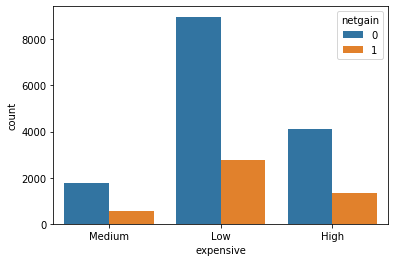

In [252]:
sns.countplot(x='expensive', hue='netgain', data=df)

- The ads which are showing are showing low expense are the one where people are more attracted and profitable. (60 %)

In [253]:
df.groupby('netgain')['expensive'].value_counts(normalize=True).mul(100)

netgain  expensive
0        Low          60.311702
         High         27.710601
         Medium       11.977697
1        Low          59.741935
         High         28.559140
         Medium       11.698925
Name: expensive, dtype: float64

### Does money_back_guarantee affect netgain?

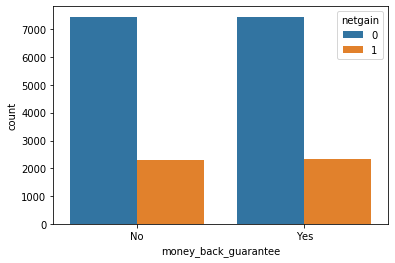

In [254]:
sns.countplot(x='money_back_guarantee', hue='netgain', data=df)

### Distribution Of Data

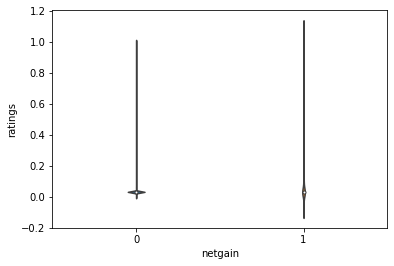

In [255]:
sns.violinplot(x='netgain', y='ratings',data=df, cut=5, width=0.1)

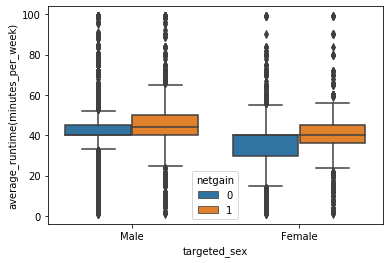

In [256]:
sns.boxplot(y='average_runtime(minutes_per_week)', x='targeted_sex', hue='netgain', data=df)

- Males like more adds where the average time 40 minutes(average run time per week)
- Females also like adds where the average time 38-42 minutes (average run time per week)

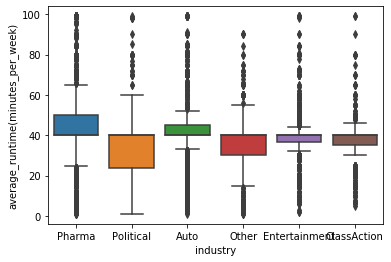

In [257]:
sns.boxplot(y='average_runtime(minutes_per_week)', x='industry', data=df)

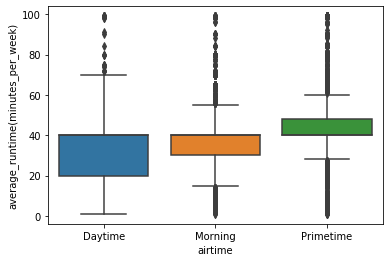

In [258]:
sns.boxplot(y='average_runtime(minutes_per_week)', x='airtime', data=df)

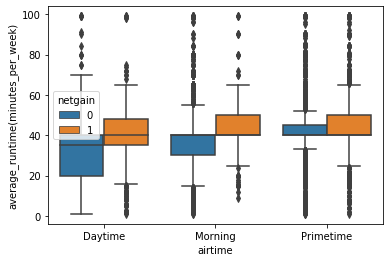

In [259]:
sns.boxplot(y='average_runtime(minutes_per_week)', x='airtime', hue='netgain', data=df)


- Primetime shows have higher average runtime
- The ads which got netgain have higher running tim

### Data Pre-Processing

In [262]:
df.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [263]:
df.drop('UserID',axis=1,inplace=True)

In [267]:
df

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
19531,Never-married,Auto,Infomercial,Male,40,Primetime,United-States,0.027465,High,Yes,0
19532,Never-married,Political,Drama,Female,15,Morning,United-States,0.027465,High,Yes,1
19533,Married-civ-spouse,Other,Comedy,Female,55,Primetime,United-States,0.027465,Low,Yes,0
19534,Never-married,Political,Comedy,Male,38,Primetime,United-States,0.027465,High,Yes,0


In [268]:
# covert all catogorical data into numeric data
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])


In [269]:
df

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,2,4,0,1,39,0,39,0.027465,2,0,0
1,4,5,0,1,34,1,19,0.027465,1,0,0
2,4,0,0,1,39,1,39,0.027465,1,0,0
3,2,4,3,1,39,2,39,0.027465,1,1,0
4,2,3,0,0,49,2,39,0.027465,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19531,4,0,3,1,39,2,39,0.027465,0,1,0
19532,4,5,2,0,14,1,39,0.027465,0,1,1
19533,2,3,0,0,54,2,39,0.027465,1,1,0
19534,4,5,0,1,37,2,39,0.027465,0,1,0


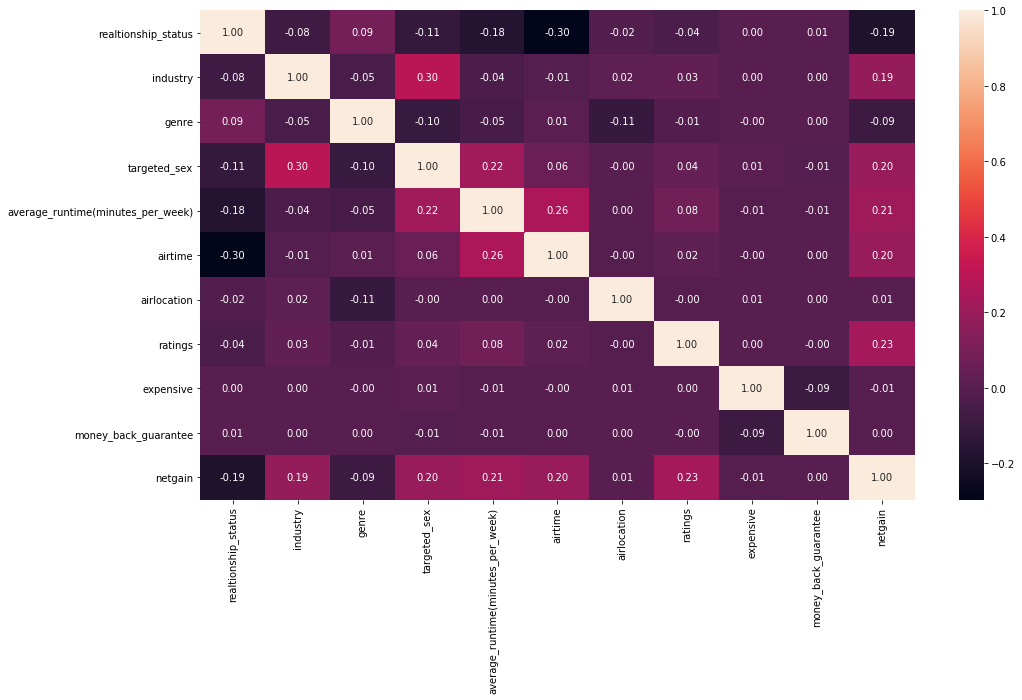

In [270]:
#Correlation betn all columns
corr = df.corr()
f,ax = plt.subplots(figsize=(16,9))
sns.heatmap(corr, cbar = True ,annot = True,fmt ='.2f',annot_kws ={'size':10})

In [271]:
X = df.drop('netgain',axis=1) # feature data set

y=df['netgain']

In [272]:
import time as time
from sklearn.preprocessing import StandardScaler
t0 = time.time()


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 9, test_size = 0.33)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [273]:
model_1 = RandomForestClassifier(random_state = 0)

model_1.fit(X_train, y_train)

pred = model_1.predict(X_test)

t1 = time.time()

print('Time Taken:', t1-t0)
print('Accuracy:', accuracy_score(y_test, pred))
print('Precision:', precision_score(y_test, pred))
print('Recall:', recall_score(y_test, pred))
print('F1_score:', f1_score(y_test, pred))
print('roc_score:',roc_auc_score(y_test, pred))
print('Confusion Matrix:', confusion_matrix(y_test, pred))

Time Taken: 9.628710508346558
Accuracy: 0.8059562587249883
Precision: 0.6029992107340174
Recall: 0.5052910052910053
F1_score: 0.5498380712486506
roc_score: 0.7016829899808623
Confusion Matrix: [[4432  503]
 [ 748  764]]


0.5513513513513514


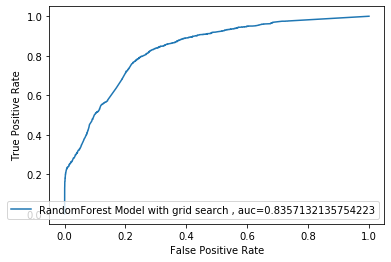

In [283]:
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#Random forest with GridSearchCV
parameters = {'n_estimators':[500]}
# instantiate random forest model
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

# grid search on random forest classifier 

grid_rf = GridSearchCV(estimator=rf, param_grid=parameters)
grid_rf.fit(X_train, y_train)

# make predictions 
y_pred_rf = grid_rf.predict(X_test)
F1_score_rf= f1_score(y_pred_rf,y_test)

# plot_cm(grid_rf, y_pred_rf)
print(F1_score_rf)

# Plot the auc-roc curve
score = roc_auc_score(y_pred_rf , y_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="RandomForest Model with grid search , auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

0.3981087470449172


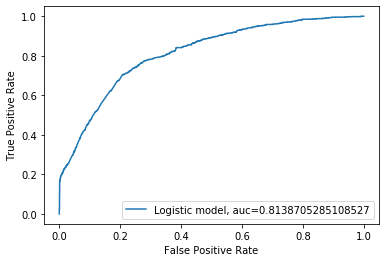

In [282]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics


# parameters for grid search
parameters = {'C':[0.1,0.5,1,5]}

# Code starts here

# instantiate logistic regression model
lr=LogisticRegression(random_state=9)
lr.fit(X_train,y_train)
# grid search on logistic regression

grid = GridSearchCV(estimator=lr, param_grid=parameters)
grid.fit(X_train, y_train)

# make predictions 
y_pred = grid.predict(X_test)
f1_score_lg= f1_score(y_pred,y_test)
# plot_cm(grid, y_pred)
print(f1_score_lg)

# Plot the auc-roc curve
score = roc_auc_score(y_pred , y_test)
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [314]:
# Creating list of class weights
class_wts = range(50)

f1s = []
auc = []
#Loop to iterate different weights to the minority class(1) 
for wt in class_wts:
    rf7 = RandomForestClassifier(random_state=9, class_weight={0:1,1:wt})
    rf7.fit(X_train, y_train)
    f1s.append(f1_score(y_test, rf7.predict(X_test)))
    auc.append(roc_auc_score(y_test, rf7.predict(X_test)))


#Selecting the max f1 score    
max_scorer = f1s.index(np.max(f1s))

#Selecting the model with the max score
rf7 = RandomForestClassifier(random_state=42, class_weight={0:1,1:max_scorer})
rf7.fit(X_train, y_train)

print ("F1 score:", f1_score(y_test, rf7.predict(X_test)))
print ("Precision:",precision_score(y_test, rf7.predict(X_test)))
print ("Recall:",recall_score(y_test, rf7.predict(X_test)))
print ("ROC Score:",roc_auc_score(y_test, rf7.predict(X_test)))
print ("Confusion Matrix:\n",confusion_matrix(y_test, rf7.predict(X_test)))

# plt.figure(figsize=(10, 8))
# plt.plot(class_wts, prs, label="Precision scores")
# plt.plot(class_wts, auc, label="AUC scores")
# plt.xlabel("class weight")
# plt.ylabel("scores")
# plt.title("Effect of Class Wt. in Imbalanced Classes")
# plt.ylim(0.45,1)
# plt.legend()
# plt.show()

F1 score: 0.6024204392649036
Precision: 0.5278868813825609
Recall: 0.7014613778705637
ROC Score: 0.7488662821556209
Confusion Matrix:
 [[2349  601]
 [ 286  672]]


In [289]:
from imblearn.over_sampling import SMOTE

# Code starts here
smote = SMOTE(random_state=0)
#Fitting and transforming data points
X_sample, y_sample = smote.fit_sample(X_train, y_train)

precision is : 0.5030946065428824
acuracy is : 0.7676438653637351
recall is : 0.7526455026455027
f1 score is : 0.6030736618971914


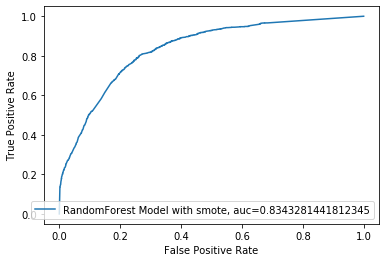

In [290]:
from sklearn.ensemble import RandomForestClassifier
rf_smote=RandomForestClassifier(random_state=0)
rf_smote.fit(X_sample,y_sample)
y_pred_smote= rf_smote.predict(X_test)
accuracy_smote= rf_smote.score(X_test,y_test)
recall_smote= recall_score(y_test,y_pred_smote)
precision_smote= precision_score(y_test,y_pred_smote)
f1_smote= f1_score(y_test,y_pred_smote)

#plots
# plot_cm(rf_smote, y_pred_smote)
#After Sampling    
print("precision is :",precision_smote)
print("acuracy is :",accuracy_smote)
print("recall is :",recall_smote)
print("f1 score is :",f1_smote)

# Plot the auc-roc curve
score = roc_auc_score(y_pred_smote , y_test)
y_pred_proba = rf_smote.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="RandomForest Model with smote, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [291]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
f1_gbc=f1_score(y_test, y_pred_gbc)
print("F1_score is ",f1_gbc)
print(classification_report(y_test, y_pred_gbc))

F1_score is  0.5403032721468475
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4935
           1       0.68      0.45      0.54      1512

    accuracy                           0.82      6447
   macro avg       0.76      0.69      0.71      6447
weighted avg       0.81      0.82      0.81      6447



precision is : 0.6198486122792263
acuracy is : 0.8096789204281061
recall is : 0.48743386243386244
f1 score is : 0.5457238059977786


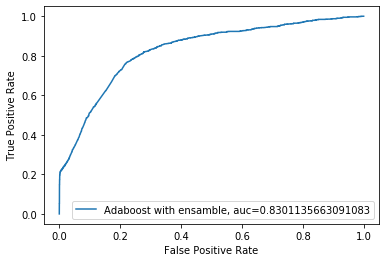

In [292]:
## from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(base_estimator = gbc, n_estimators=100)
adc.fit(X_train, y_train)
y_pred_adc = adc.predict(X_test)
accuracy_en=adc.score(X_test,y_test)
recall_en= recall_score(y_test,y_pred_adc)
precision_en= precision_score(y_test,y_pred_adc)
f1_en= f1_score(y_test,y_pred_adc)

#plots
# plot_cm(adc, y_pred_adc)
#After Sampling    
print("precision is :",precision_en)
print("acuracy is :",accuracy_en)
print("recall is :",recall_en)
print("f1 score is :",f1_en)

# Plot the auc-roc curve
score = roc_auc_score(y_pred_adc , y_test)
y_pred_proba = adc.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Adaboost with ensamble, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

precision is : 0.6904024767801857
acuracy is : 0.8178096212896623
recall is : 0.46555323590814196
f1 score is : 0.5561097256857854


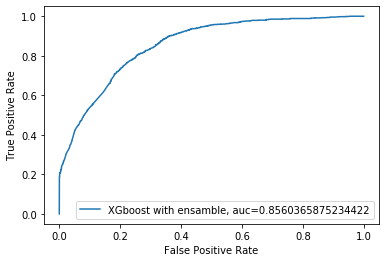

Classification_report rf with normal xgboost
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      2950
           1       0.69      0.47      0.56       958

    accuracy                           0.82      3908
   macro avg       0.77      0.70      0.72      3908
weighted avg       0.81      0.82      0.80      3908



In [307]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42, n_jobs = -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#fit the best models so far
xgb.fit(X_train, y_train)


y_pred_xg = xgb.predict(X_test)
accuracy_xg=xgb.score(X_test,y_test)
recall_xg= recall_score(y_test,y_pred_xg )
precision_xg= precision_score(y_test,y_pred_xg )
f1_xg= f1_score(y_test,y_pred_xg)

#plots
# plot_cm(xgb, y_pred_xg)
#After Sampling    
print("precision is :",precision_xg)
print("acuracy is :",accuracy_xg)
print("recall is :",recall_xg)
print("f1 score is :",f1_xg)

# Plot the auc-roc curve
score = roc_auc_score(y_pred_xg , y_test)
y_pred_proba = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="XGboost with ensamble, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
print('Classification_report rf with normal xgboost' + '\n' + classification_report(y_test,y_pred_xg))

In [298]:
# Code Starts here
# Code starts here
test_data=pd.read_csv('test.csv')
test_data.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No


In [299]:
test_data.shape

(6512, 11)

In [300]:
test_data.drop(['UserID'],axis = 1, inplace = True)
# # Code ends here

In [301]:
test_data

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No
...,...,...,...,...,...,...,...,...,...,...
6507,Never-married,Political,Drama,Male,40,Primetime,International,0.027465,Low,Yes
6508,Divorced,Entertainment,Comedy,Female,40,Primetime,United-States,0.027465,Low,Yes
6509,Married-civ-spouse,Pharma,Comedy,Male,40,Primetime,United-States,0.027465,High,Yes
6510,Divorced,Auto,Comedy,Female,35,Primetime,United-States,0.027465,Low,Yes


In [302]:
# covert all catogorical data into numeric data
from sklearn.preprocessing import LabelEncoder

for column in test_data.columns:
  if test_data[column].dtype == np.number:
    continue
  test_data[column] = LabelEncoder().fit_transform(test_data[column])

In [303]:
# Scaler tranformation
test_data = scaler.transform(test_data)

In [315]:
# Code starts here
# Predict on the test data
ygrid_rf= rf7.predict(test_data)

print(ygrid_rf)
# Create a sample submission file
sample_submission = pd.DataFrame({'netgain':ygrid_rf})

# Convert the sample submission file into a csv file
sample_submission.to_csv('netgain_ygrid_rf.csv',index=False)

[0 0 0 ... 0 0 0]


In [ ]:
df

In [316]:
# Code Starts here
sample_submission['netgain'].value_counts()

0    5979
1     533
Name: netgain, dtype: int64

In [1]:
import pandas as pd
import numpy as np

s = pd.Series(np.random.randn(4))

print (s.ndim)

1


In [2]:
[1,2,3] * 2

[1, 2, 3, 1, 2, 3]